In [1]:
import collections
import itertools
import functools
import multiprocessing

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from helper import distance

In [2]:
wind_stations_df = pd.read_csv('https://dd.weather.gc.ca/climate/observations/climate_station_list.csv')

In [3]:
wind_stations_df

,Station Name,Province,Latitude,Longitude,Elevation,Climate ID,WMO Identifier,TC Identifier,First Year,Last Year,HLY First Year,HLY Last Year,DLY First Year,DLY Last Year,MLY First Year,MLY Last Year
0,(AE) BOW SUMMIT,ALBERTA,51.70,-116.47,2080.0,3050PPF,NaN,NaN,1998,2007,NaN,NaN,1998.0,2007.0,1998.0,2007.0
1,100 MILE HOUSE,BRITISH COLUMBIA,51.65,-121.30,1059.2,1165791,NaN,NaN,1970,1999,NaN,NaN,1970.0,1999.0,1970.0,1999.0
2,100 MILE HOUSE,BRITISH COLUMBIA,51.65,-121.27,929.6,1095790,NaN,NaN,1957,1959,NaN,NaN,1957.0,1959.0,1957.0,1959.0
3,100 MILE HOUSE 6NE,BRITISH COLUMBIA,51.68,-121.22,928.0,1165793,NaN,NaN,1987,2023,NaN,NaN,1987.0,2023.0,1987.0,2007.0
4,108 MILE HOUSE,BRITISH COLUMBIA,51.75,-121.33,957.1,1095796,NaN,NaN,1970,1973,NaN,NaN,1970.0,1973.0,1970.0,1973.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8547,ZEBALLOS MURAUDE CREEK,BRITISH COLUMBIA,50.05,-126.78,103.0,1039035,NaN,NaN,2010,2023,NaN,NaN,2010.0,2023.0,NaN,NaN
8548,ZEHNER,SASKATCHEWAN,50.63,-104.40,682.8,4019200,NaN,NaN,1961,1999,NaN,NaN,1961.0,1999.0,1961.0,1999.0
8549,ZELMA,SASKATCHEWAN,51.80,-105.93,541.0,4059220,NaN,NaN,1981,1989,NaN,NaN,1981.0,1989.0,1981.0,1989.0
8550,ZHODA,MANITOBA,49.25,-96.52,304.8,5023370,NaN,NaN,1980,2000,NaN,NaN,1980.0,2000.0,1980.0,2000.0


In [4]:
# distance_df = pd.DataFrame(
#     columns=[
#         'Climate ID',
#         *[
#             row_j['Climate ID']
#             for _, row_j in wind_stations_df.iterrows()
#         ]
#     ],
#     data=[
#         [
#             row_i['Climate ID'],
#             *[
#                 0 if idx_i == idx_j else distance(
#                     lat1=row_i['Latitude'],
#                     lon1=row_i['Longitude'],
#                     lat2=row_j['Latitude'],
#                     lon2=row_j['Longitude'],
#                 )
#                 for idx_j, row_j in wind_stations_df.iterrows()
#             ]
#         ]
#         for idx_i, row_i in wind_stations_df.iterrows()
#     ]
# )
# distance_df.set_index('Climate ID', inplace=True)

In [5]:
def process_distance_row(item_i):
    idx_i, row_i = item_i

    return [
        row_i['Climate ID'],
        *[
            0 if idx_i == idx_j else distance(
                lat1=row_i['Latitude'],
                lon1=row_i['Longitude'],
                lat2=row_j['Latitude'],
                lon2=row_j['Longitude'],
            )
            for idx_j, row_j in wind_stations_df.iterrows()
        ]
    ]

with multiprocessing.Pool(processes=8) as pool:
    wind_turbine_distance_df = pd.DataFrame(
        columns=[
            'Climate ID',
            *[
                row_j['Climate ID']
                for _, row_j in wind_stations_df.iterrows()
            ]
        ],
        data=pool.imap(
            func=process_distance_row,
            iterable=wind_stations_df.iterrows(),
            chunksize=16,
        )
    )
wind_turbine_distance_df.set_index('Turbine identifier', inplace=True)

In [8]:
wind_turbine_distance_df.to_csv('wind_station_distance.csv')

In [9]:
wind_turbine_distance_df

,3050PPF,1165791,1095790,1165793,1095796,109E7R6,116N7R6,1095820,1095821,8403990,...,3017705,1199020,3078000,1039030,1039040,1039035,4019200,4059220,5023370,6129850
Turbine identifier,,,,,,,,,,,,,,,,,,,,,
3050PPF,0.000000e+00,3.330352e+05,3.309680e+05,3.273745e+05,3.347323e+05,3.304611e+05,3.348713e+05,3.773425e+05,3.832018e+05,4.137631e+06,...,3.633215e+05,8.589730e+05,7.838662e+05,7.528144e+05,7.490164e+05,7.456068e+05,8.489819e+05,7.250278e+05,1.433074e+06,2.744013e+06
1165791,3.330352e+05,0.000000e+00,2.069772e+03,6.447589e+03,1.131007e+04,4.329994e+03,5.932117e+03,6.782964e+04,7.949918e+04,4.451639e+06,...,6.963443e+05,8.040382e+05,7.822928e+05,4.317288e+05,4.272719e+05,4.237172e+05,1.181812e+06,1.056827e+06,1.765919e+06,3.075985e+06
1095790,3.309680e+05,2.069772e+03,0.000000e+00,4.797904e+03,1.186344e+04,3.406492e+03,6.930202e+03,6.916035e+04,8.075731e+04,4.449716e+06,...,6.942764e+05,8.040701e+05,7.819676e+05,4.336308e+05,4.291813e+05,4.256279e+05,1.179743e+06,1.054773e+06,1.763849e+06,3.073916e+06
1165793,3.273745e+05,6.447589e+03,4.797904e+03,0.000000e+00,1.086349e+04,7.219934e+03,7.901867e+03,6.904127e+04,8.039250e+04,4.445280e+06,...,6.906954e+05,8.007980e+05,7.781389e+05,4.381163e+05,4.336510e+05,4.300948e+05,1.176235e+06,1.050952e+06,1.760343e+06,3.070560e+06
1095796,3.347323e+05,1.131007e+04,1.186344e+04,1.086349e+04,0.000000e+00,1.523957e+04,5.559746e+03,5.817810e+04,6.954421e+04,4.449458e+06,...,6.980133e+05,7.928921e+05,7.716489e+05,4.343695e+05,4.298129e+05,4.262416e+05,1.183707e+06,1.057593e+06,1.767804e+06,3.078357e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039035,7.456068e+05,4.237172e+05,4.256279e+05,4.300948e+05,4.262416e+05,4.249997e+05,4.239944e+05,4.094286e+05,4.115119e+05,4.875299e+06,...,1.103730e+06,1.038665e+06,1.067699e+06,9.252124e+03,3.620213e+03,0.000000e+00,1.583527e+06,1.469131e+06,2.165419e+06,3.466560e+06
4019200,8.489819e+05,1.181812e+06,1.179743e+06,1.176235e+06,1.183707e+06,1.179122e+06,1.183781e+06,1.224916e+06,1.229893e+06,3.366550e+06,...,4.859342e+05,1.423030e+06,1.293428e+06,1.589933e+06,1.586755e+06,1.583527e+06,0.000000e+00,1.681656e+05,5.841077e+05,1.896143e+06
4059220,7.250278e+05,1.056827e+06,1.054773e+06,1.050952e+06,1.057593e+06,1.054495e+06,1.058223e+06,1.094669e+06,1.098615e+06,3.438494e+06,...,3.665522e+05,1.255475e+06,1.125447e+06,1.476060e+06,1.472482e+06,1.469131e+06,1.681656e+05,0.000000e+00,7.224313e+05,2.036049e+06


<Axes: ylabel='Frequency'>

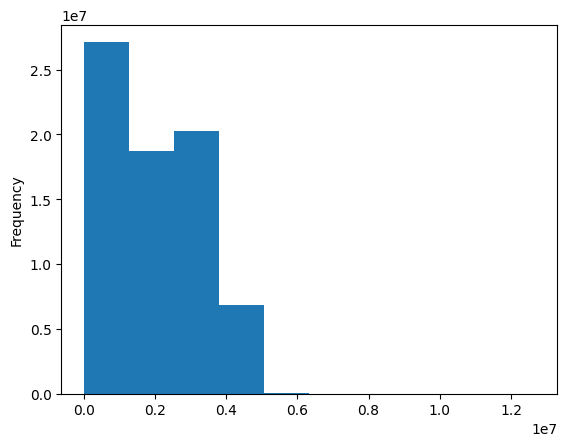

In [10]:
wind_turbine_distance_df.stack().plot.hist()